# Principal Component Analysis

Use principal component anlaysis(PCA) to preform dimensionality reduction.

In [1]:
import numpy as np
from scipy.io import loadmat
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## 1 Visualizing the data

In [2]:
data = loadmat('data/ex7data1.mat')
X = data['X']
X.shape

(50, 2)

Text(0, 0.5, '$x_2$')

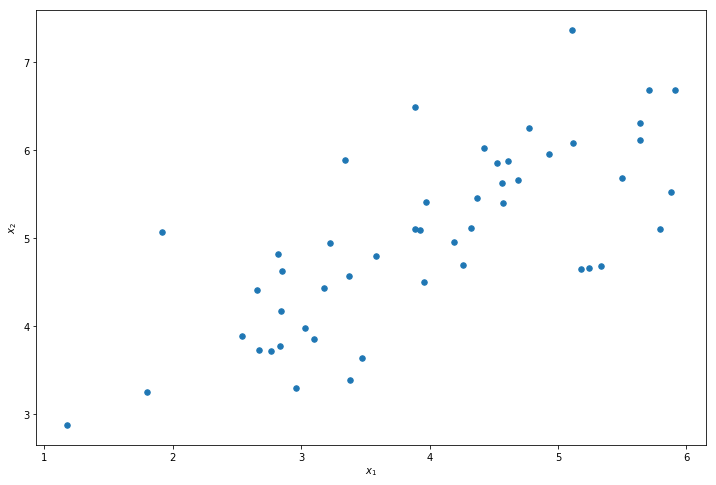

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[:, 0], X[:, 1], s=30)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

## 2 Implement PCA

In [4]:
def expand(a, dim):
    return np.tile(a, (dim, 1))

In [5]:
def feature_normalize(X):
    mean = expand(X.mean(axis=0), X.shape[0])
    std = expand(X.std(axis=0, ddof=1), X.shape[0])
    return (X - mean) / std

In [6]:
def compute_covariance(X):
    return (1 / len(X)) * (X.T @ X)

In [7]:
def project_data(X, U, k):
    U_reduce = U[:, :k]
    return X @ U_reduce

In [8]:
def recover_data(Z, U):
    U_reduce = U[:, :Z.shape[1]]
    return Z @ U_reduce.T

In [9]:
def pca(X):
    X_norm = feature_normalize(X)
    cov = compute_covariance(X_norm)
    return la.svd(cov)

In [10]:
U, S, V = pca(X)
Z = project_data(feature_normalize(X), U, 1)
print(Z[:10])

[[ 1.48127391]
 [-0.91291229]
 [ 1.21208656]
 [ 1.62734009]
 [ 1.26042409]
 [-0.96700223]
 [ 1.25605967]
 [-2.31794969]
 [-0.02968998]
 [-0.77386123]]


In [12]:
X_approx = recover_data(Z, U)
X_approx.shape

(50, 2)

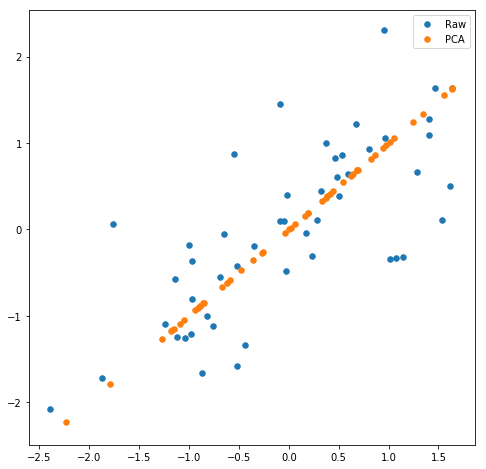

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
X_norm = feature_normalize(X)
ax.scatter(X_norm[:, 0], X_norm[:, 1], s=30, label='Raw')
ax.scatter(X_approx[:, 0], X_approx[:, 1], s=30, label='PCA')
ax.legend()

## 2 Dimension reduction on face image

In [14]:
data = loadmat('data/ex7faces.mat')
X = data['X']
X = np.array([x.reshape(32, 32).T.reshape(1024) for x in X])
X.shape

(5000, 1024)

### Visualizing the data

In [15]:
def plot_n_image(X, n=100):
    grid = int(np.sqrt(n))
    pic_size = int(np.sqrt(X.shape[1]))
    images = X[:n, :]
    
    fig, ax = plt.subplots(nrows=grid, ncols=grid, 
                           sharey=True, sharex=True, 
                           figsize=(grid, grid))
    for r in range(grid):
        for c in range(grid):
            idx = r * grid + c
            ax[r, c].matshow(images[idx].reshape(pic_size, pic_size), cmap=mpl.cm.gray)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

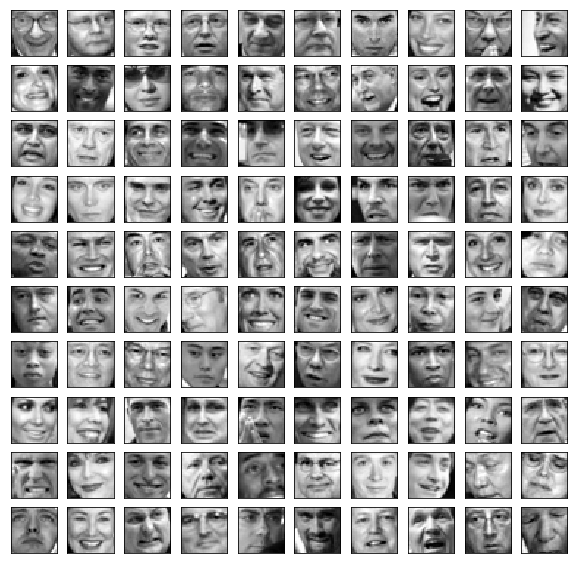

In [16]:
plot_n_image(X)

### Run PCA

In [17]:
U, S, V = pca(X)
U.shape

(1024, 1024)

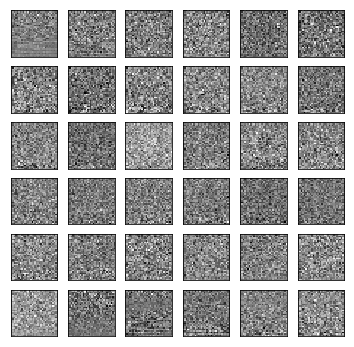

In [19]:
plot_n_image(U, n=36)

### Reduce dimension to k = 100

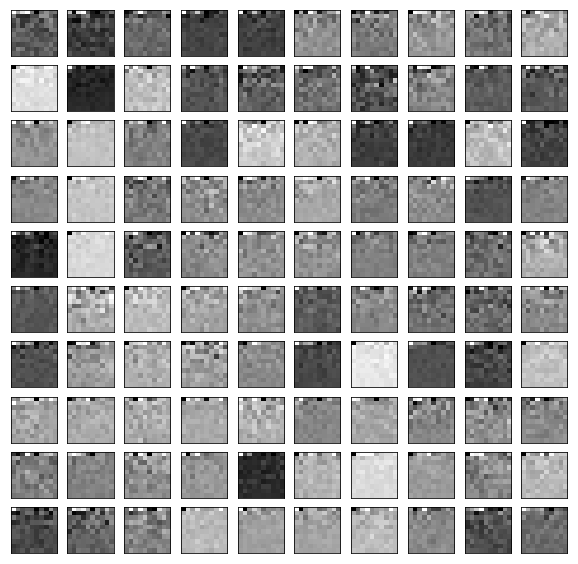

In [20]:
Z = project_data(X, U, 100)
plot_n_image(Z, 100)

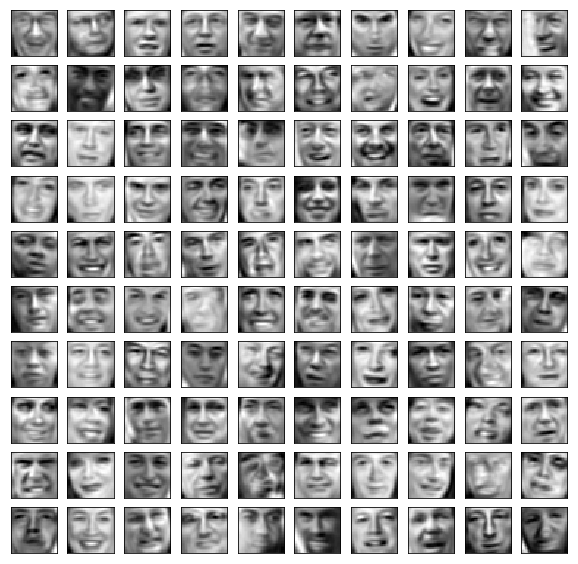

In [21]:
X_approx = recover_data(Z, U)
plot_n_image(X_approx, 100)